test1: 12 12
part1: 230686500 230686500
1571


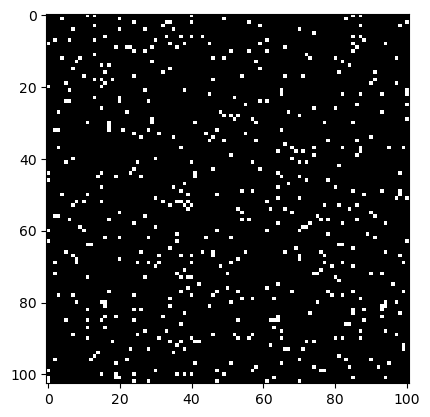

7672


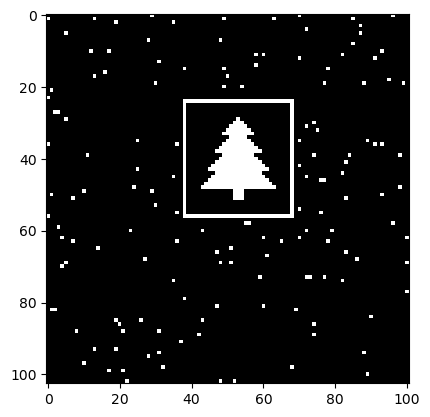

11974


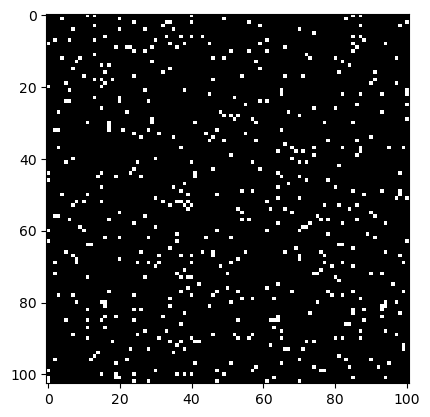

18075


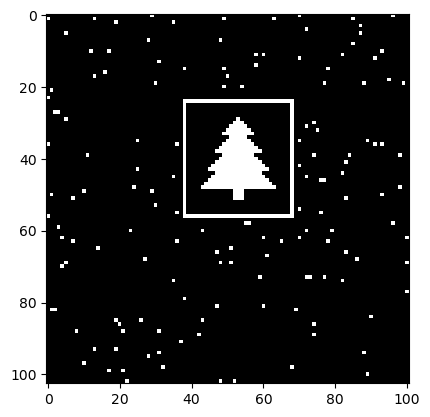

22377


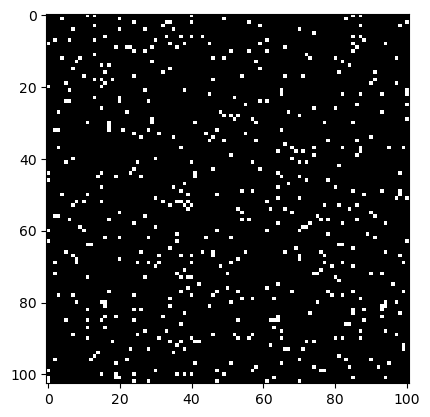

28478


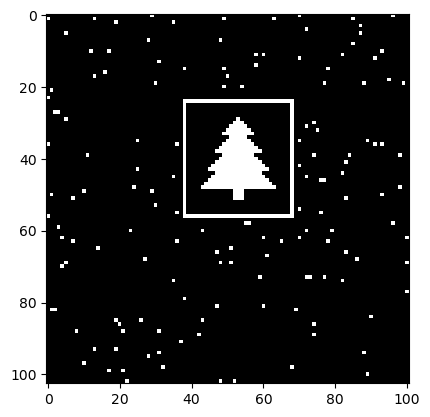

32780


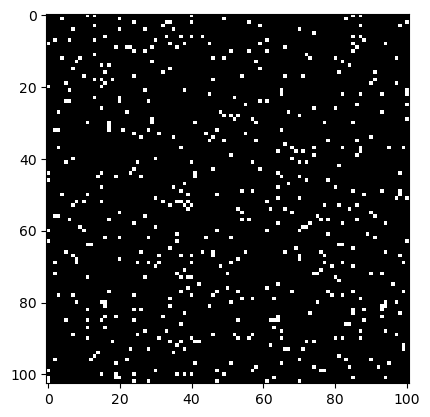

38881


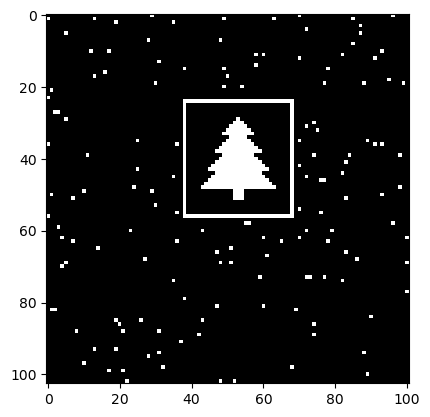

43183


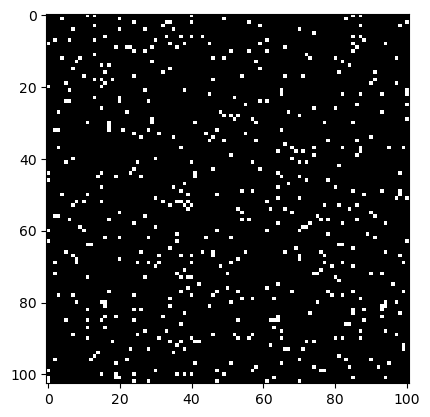

49284


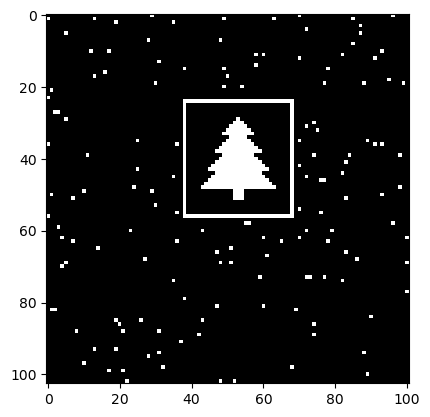

53586


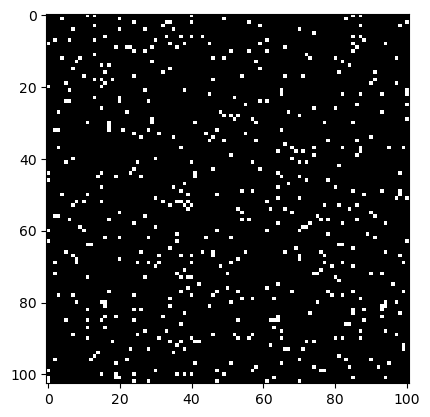

59687


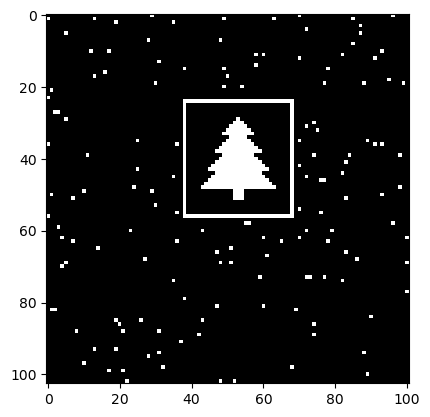

63989


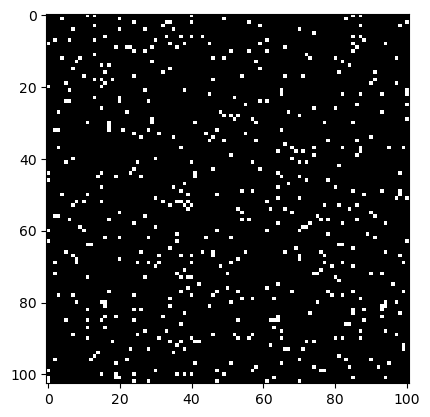

70090


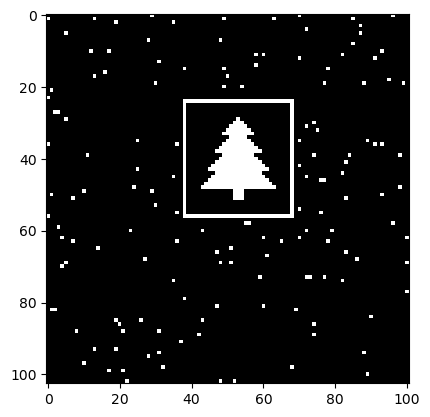

74392


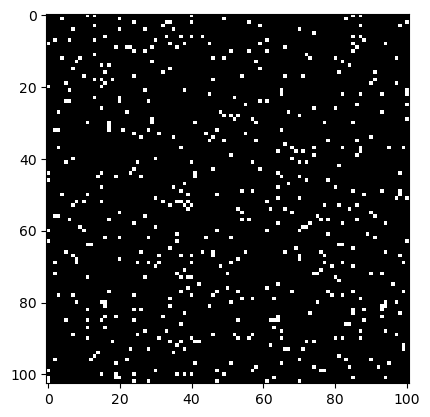

80493


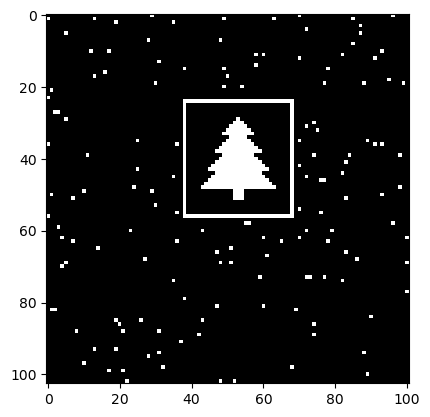

84795


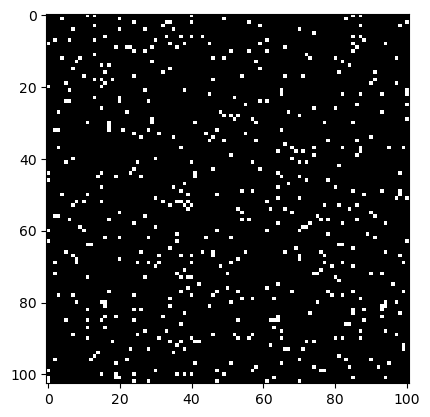

90896


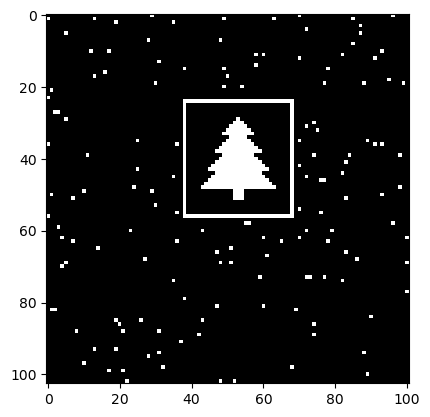

95198


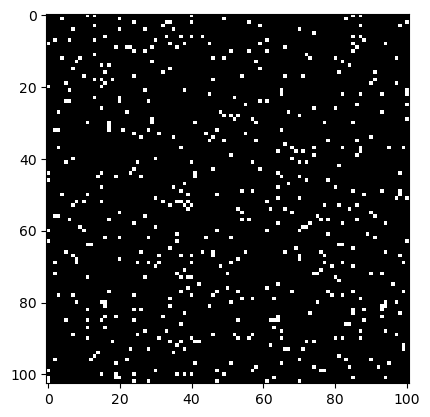

101299


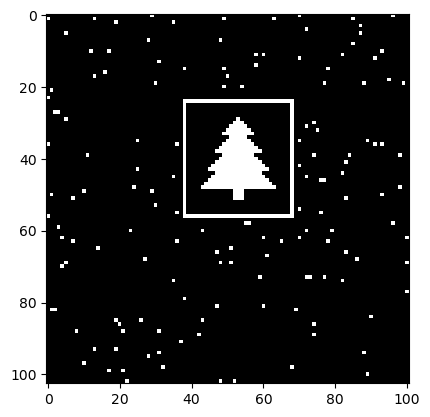

105601


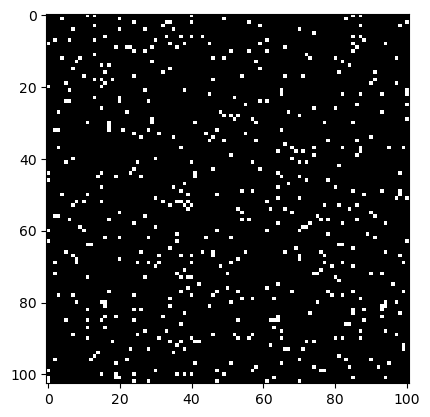

111702


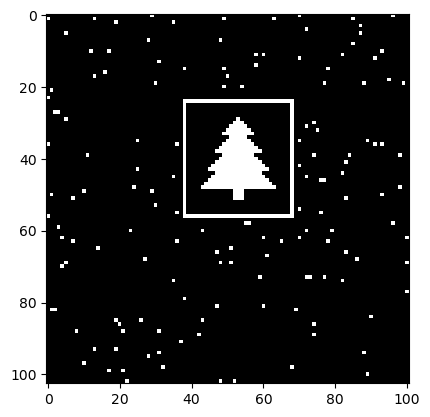

116004


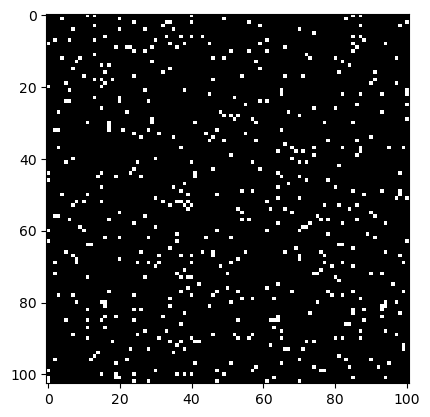

122105


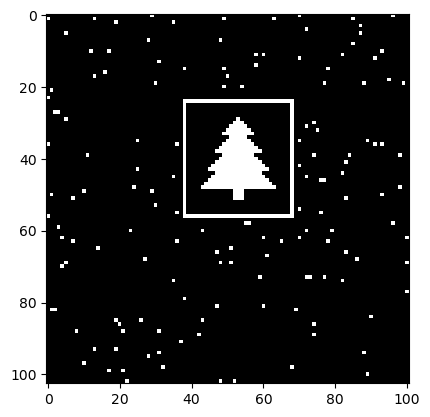

126407


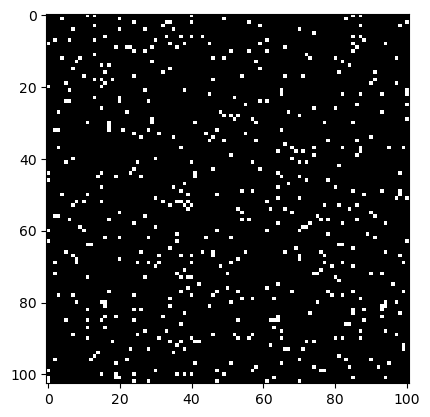

132508


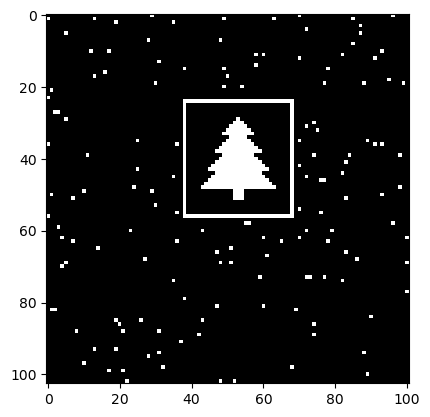

136810


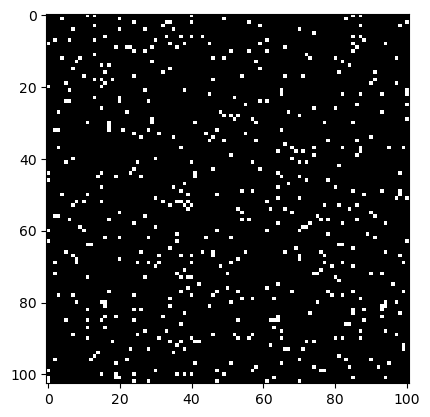

142911


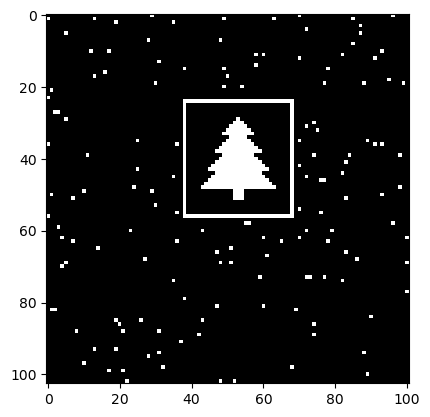

147213


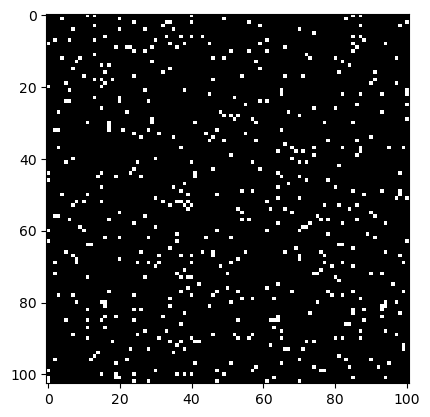

153314


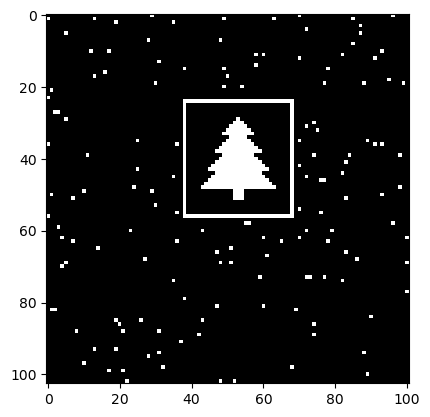

157616


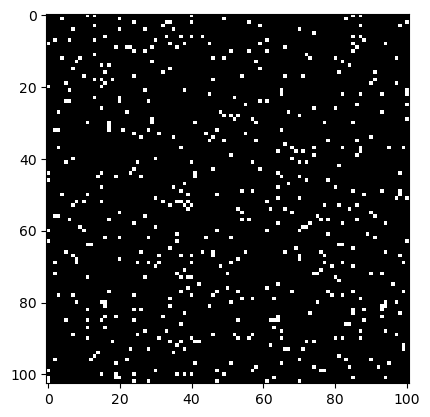

163717


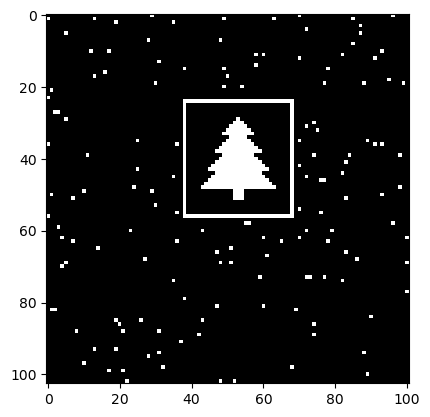

168019


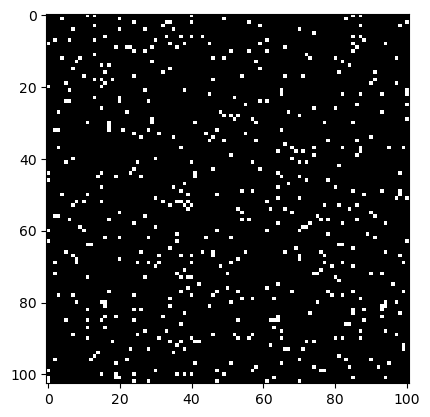

174120


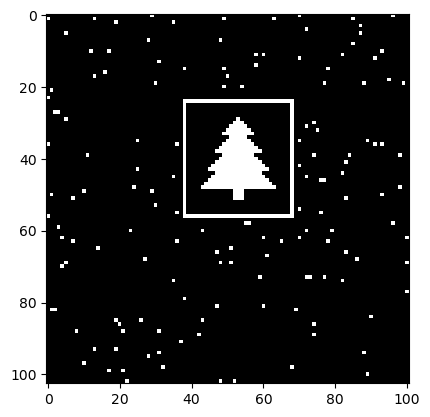

178422


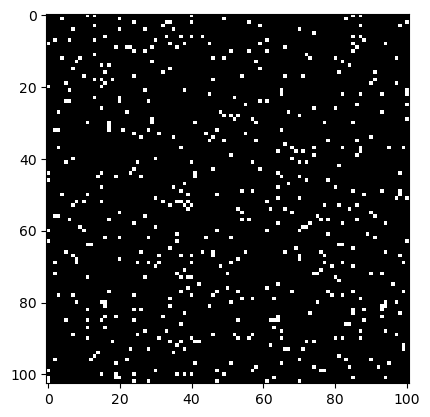

184523


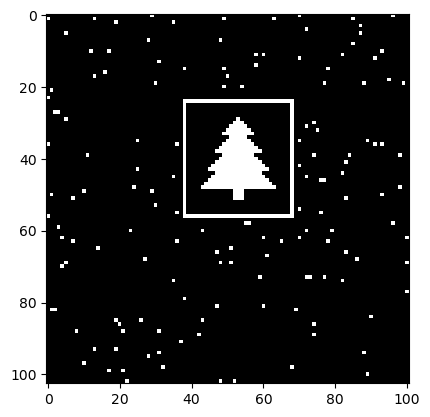

188825


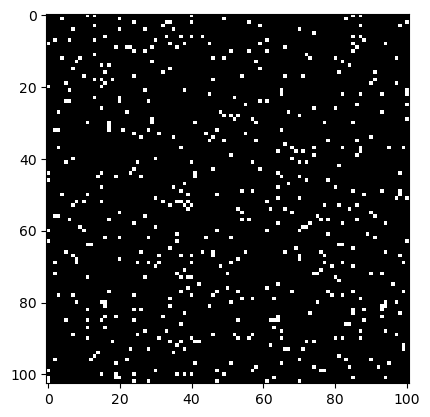

194926


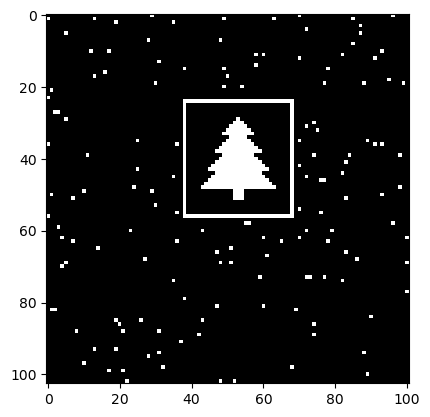

199228


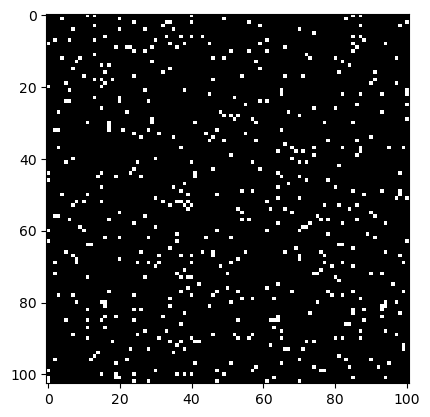

205329


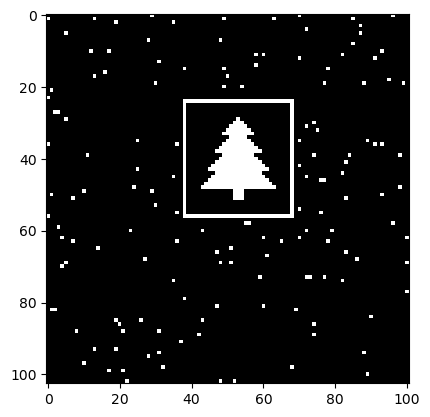

209631


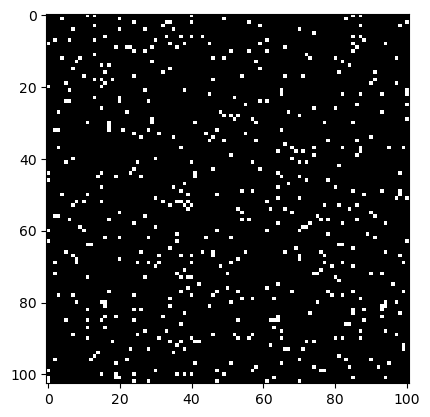

215732


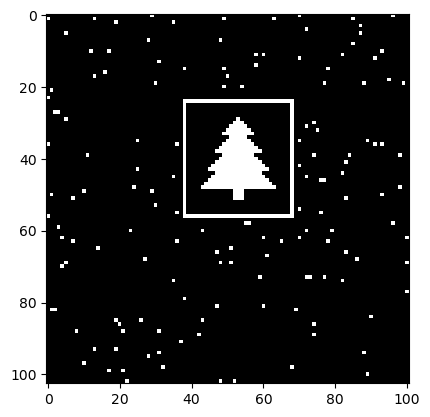

220034


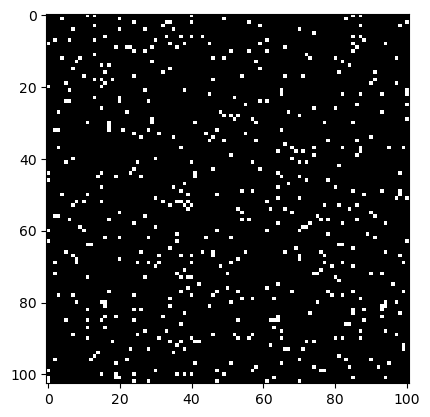

226135


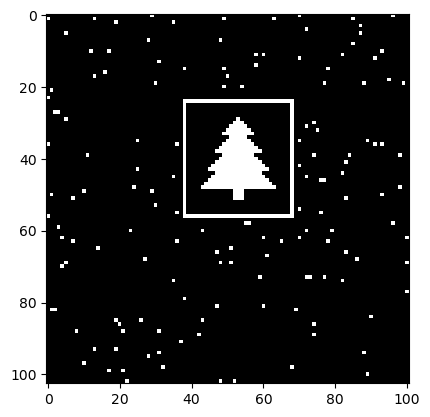

230437


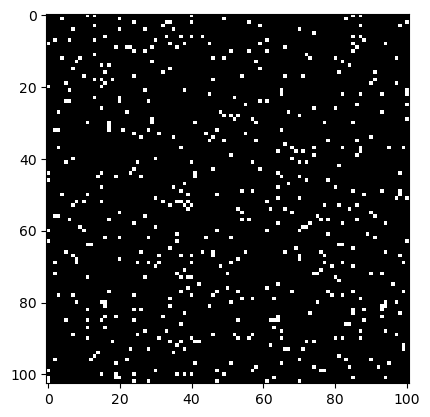

236538


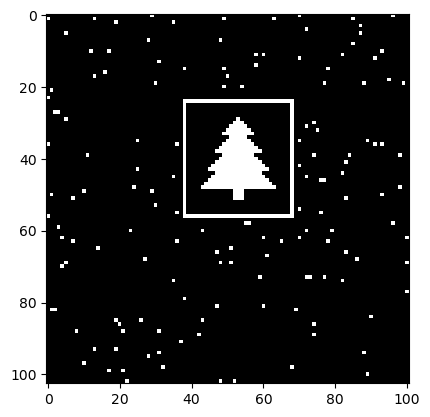

240840


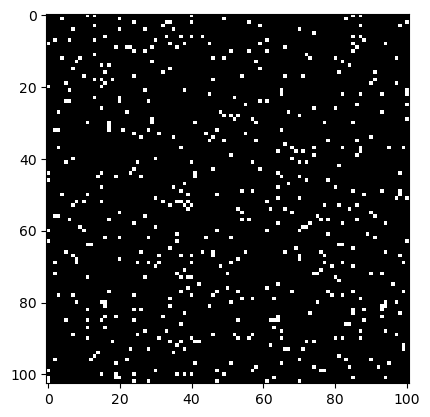

246941


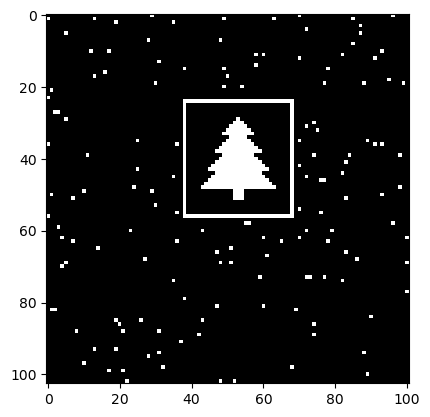

251243


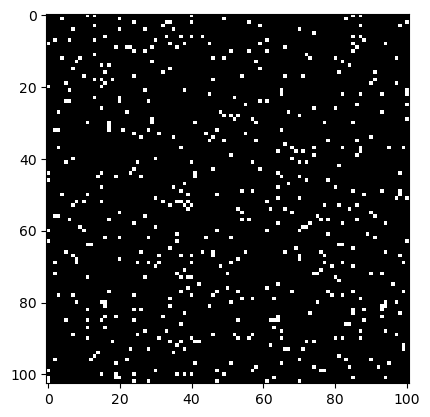

257344


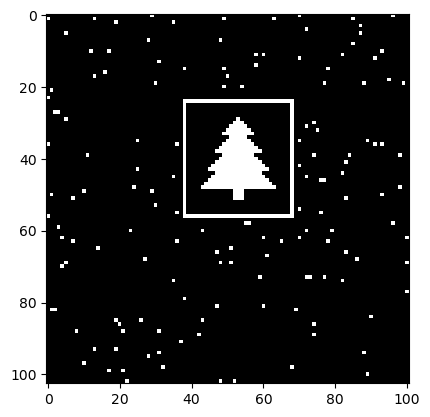

261646


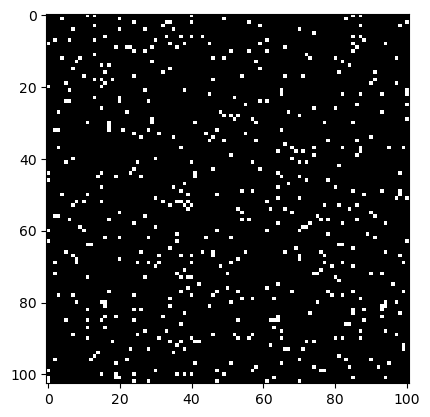

In [ ]:
import re

from matplotlib import pyplot as plt
import numpy as np
import time

def extract_integers(text):
    # Matches negative and positive integers
    # -? optionally matches minus sign 
    # \d+ matches one or more digits
    numbers = re.findall(r'-?\d+', text)
    # Convert strings to integers
    return tuple([int(n) for n in numbers])


def parse(fn):
    d=[]
    for r in open(fn).readlines():
        d.append(extract_integers(r))
    return d



def overlaps(R):
    Z=set([x[0]+x[1]*1j for x in R])
    return len(R)-len(Z)

def solve1(fn,w,h):
    R=parse(fn)
    for i in range(100):
        RR=[]
        for x,y,dx,dy in R:
            x+=dx
            y+=dy
            while x >= w:
                x-=w
            while y >= h:
                y-=h
            while x < 0:
                x+=w
            while y < 0:
                y+=h
            RR.append((x,y,dx,dy))
        R=RR   
        
    Q=[0,0,0,0]
    ww=(w-1)/2
    hh=(h-1)/2
    for x,y,dx,dy in R:
        if   x < ww:
            if   y < hh:
                Q[0]+=1
            elif y > hh:
                Q[1]+=1
        elif x > ww:
            if   y < hh:
                Q[2]+=1
            elif y > hh:
                Q[3]+=1
    #print(Q)
    return Q[0]*Q[1]*Q[2]*Q[3]


def solve2(fn,w,h):
    
    
    image = np.random.rand(h, w)

    
    
    
    R=parse(fn)
    i=0
    while 1:
        i+=1
        RR=[]
        for x,y,dx,dy in R:
            x+=dx
            y+=dy
            while x >= w:
                x-=w
            while y >= h:
                y-=h
            while x < 0:
                x+=w
            while y < 0:
                y+=h
            RR.append((x,y,dx,dy))
        R=RR
        if overlaps(R)==0:
            print(i)
            image*=0
            for x,y,dx,dy in R:
                image[y,x]=255
            plt.imshow(image, cmap='gray')
            plt.show()
        #print(overlaps(R))
    
    return 1




print("test1:",solve1("14.tst",11,7),12)
print("part1:",solve1("14.txt",101,103), 230686500)
#1860499 too low

print("part2:",solve2("14.txt",101,103),11974)

